In [ ]:
#install required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-12-09 17:16:16.459453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-09 17:16:16.591838: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-09 17:16:16.596985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-09 17:16:16.597002: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
# assign folder paths to variables

train_data_dir= "../data/raw_data/Training"
test_data_dir = "../data/raw_data/Testing"

In [ ]:
filepaths = [] # To store full file paths of each file
labels = [] # To store corresponding labels

folds = os.listdir(train_data_dir) # Retrieves the list of subdirectory (fodls) in train_data-dir.
                                   # These will be treated as labels

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold) #For each subdirectory (fold), construct the full path
    filelist = os.listdir(foldpath) #retrieve the list of files inside the current subdirectory
    for file in filelist:
        fpath = os.path.join(foldpath, file) #Construct each file's full path
        filepaths.append(fpath) #Append the full path to the list of paths
        labels.append(fold) #Add the directory name as label in the list of labels

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
# Split train and validation datraset

X_train, X_valid = train_test_split(train_df,  train_size=0.8 , shuffle= True, random_state= 123)

In [ ]:
# Visualize the train dataset

X_train.head()

,filepaths,labels
2730,../data/raw_data/Training/pituitary/Tr-pi_0161...,pituitary
4748,../data/raw_data/Training/notumor/Tr-no_1183.jpg,notumor
4811,../data/raw_data/Training/notumor/Tr-no_0256.jpg,notumor
3789,../data/raw_data/Training/pituitary/Tr-pi_0215...,pituitary
1672,../data/raw_data/Training/meningioma/Tr-me_118...,meningioma


In [ ]:
# Set some parameters for the preprocessing tools
batch_size = 16
img_size = (224, 224)

# Initialize preprocessing tools
tr_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

# "flow_from_dataframe" will take a dataframe as input which contain
# a column with filenames and a column with class names
# and directly read the images from the directory with respective class names already mapped
train_gen = tr_gen.flow_from_dataframe( X_train, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

val_gen = val_gen.flow_from_dataframe( X_valid, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)


Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.


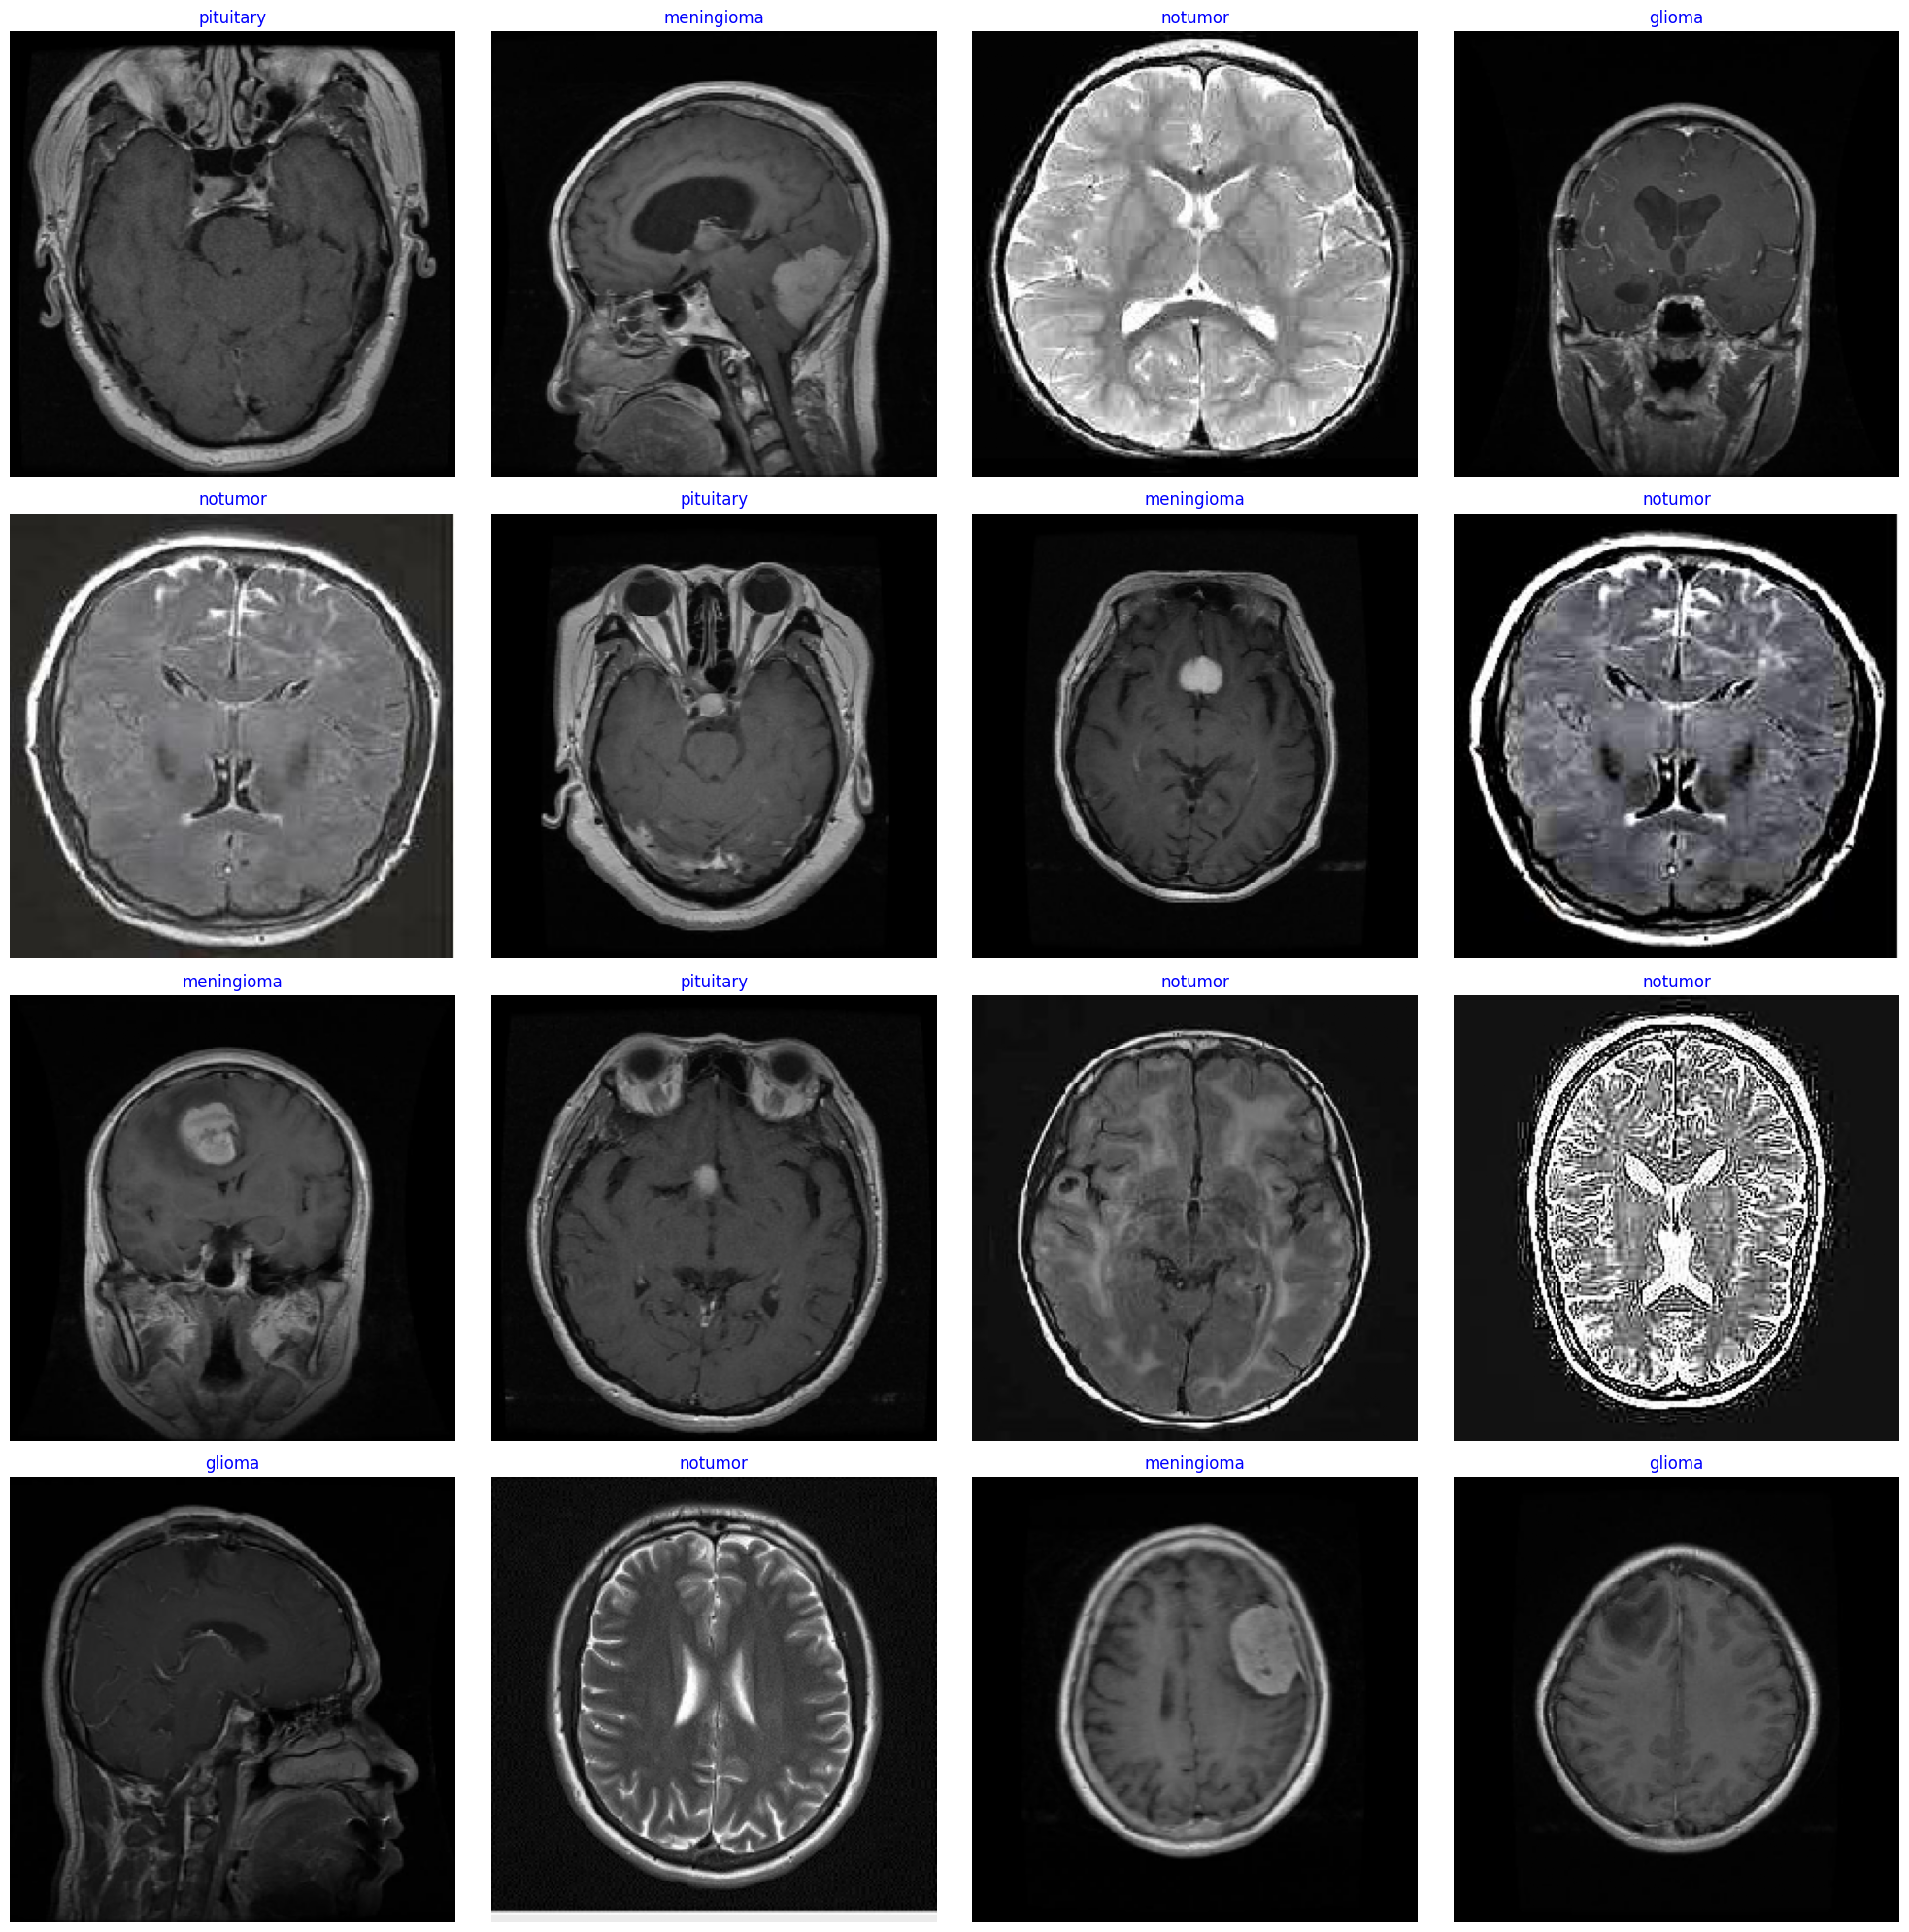

In [ ]:
g_dict = train_gen.class_indices      # Defines dictionary {'class': index}
classes = list(g_dict.keys())       # Defines list of dictionary's keys (classes), classes names : string
images, labels = next(train_gen)      # Get a batch size samples from the generator

plt.figure(figsize= (20, 20)) # Set figure size

for i in range(16):
    plt.subplot(4, 4, i + 1)      # Create a subfigure in the figure
    image = images[i] / 255       # Scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # Get image index
    class_name = classes[index]   # Get class of image
    plt.title(class_name, color= 'blue', fontsize= 12) # Set correct parameters for the subfigure
    plt.axis('off')
plt.tight_layout()
plt.show()